In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
daily_price_df = pd.read_excel('ice_electric-2022final.xlsx')
for hub in daily_price_df['Price hub'].unique():
    print(hub + ':')
    print(len(daily_price_df[daily_price_df['Price hub'] == hub]))
# print(len(daily_price_df[daily_price_df['Price hub'] == '']))
daily_price_df.head()

NameError: name 'pd' is not defined

In [ ]:
print(len(daily_price_df))
daily_price_df.groupby('Price hub')['Number of trades'].mean()

1237


Price hub
Indiana Hub RT Peak         2.437500
Mid C Peak                 44.291139
NP15 EZ Gen DA LMP Peak     4.671642
Nepool MH DA LMP Peak      12.748744
PJM WH Real Time Peak      15.555085
Palo Verde Peak            10.713080
SP15 EZ Gen DA LMP Peak    21.528384
Name: Number of trades, dtype: float64

In [ ]:
daily_price_df[daily_price_df['Price hub'] == 'Indiana Hub RT Peak']
daily_price_df[daily_price_df['Delivery start date'] != daily_price_df['Delivery \nend date']]

,Price hub,Trade date,Delivery start date,Delivery \nend date,High price $/MWh,Low price $/MWh,Wtd avg price $/MWh,Change,Daily volume MWh,Number of trades,Number of counterparties
32,Mid C Peak,2021-12-29 00:00:00,2021-12-30,2021-12-31,68.0,65.0,65.93,-29.49,18400,23,13
37,Mid C Peak,2022-01-06 00:00:00,2022-01-07,2022-01-08,37.0,36.0,36.47,-11.92,17600,22,10
41,Mid C Peak,2022-01-12 00:00:00,2022-01-13,2022-01-14,39.0,36.5,38.37,-0.82,31200,39,13
43,Mid C Peak,2022-01-14 00:00:00,2022-01-17,2022-01-18,39.5,38.0,38.87,1.33,36000,44,13
46,Mid C Peak,2022-01-20 00:00:00,2022-01-21,2022-01-22,39.0,35.0,36.73,8.73,30400,35,10
...,...,...,...,...,...,...,...,...,...,...,...
1220,SP15 EZ Gen DA LMP Peak,2022-12-01 00:00:00,2022-12-02,2022-12-03,175.0,168.0,171.36,-5.73,8800,10,9
1225,SP15 EZ Gen DA LMP Peak,2022-12-08 00:00:00,2022-12-09,2022-12-10,265.0,225.0,254.38,72.56,6400,8,9
1230,SP15 EZ Gen DA LMP Peak,2022-12-15 00:00:00,2022-12-16,2022-12-17,290.0,260.0,279.53,30.17,12000,15,14
1233,SP15 EZ Gen DA LMP Peak,2022-12-20 00:00:00,2022-12-21,2022-12-22,285.0,265.0,277.38,-42.72,12800,12,13


In [ ]:
daily_price_df['Trade date'] = pd.to_datetime(daily_price_df['Trade date'], errors='coerce')

In [ ]:
daily_2023.columns

Index(['Price hub', 'Trade date', 'Delivery start date', 'Delivery \nend date',
       'High price $/MWh', 'Low price $/MWh', 'Wtd avg price $/MWh', 'Change',
       'Daily volume MWh', 'Number of trades', 'Number of counterparties'],
      dtype='object')

In [22]:
daily_2023 = pd.read_excel('ice_electric-2023.xlsx')
len(daily_2023)
daily_2023.columns.tolist()
for hub in daily_2023['Price hub'].unique():
    print(hub + ':')
    print(len(daily_2023[daily_2023['Price hub'] == hub]))

Indiana Hub RT Peak:
38
Mid C Peak:
209
Nepool MH DA LMP Peak:
175
NP15 EZ Gen DA LMP Peak:
85
Palo Verde Peak:
208
PJM WH Real Time Peak:
211
SP15 EZ Gen DA LMP Peak:
202


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


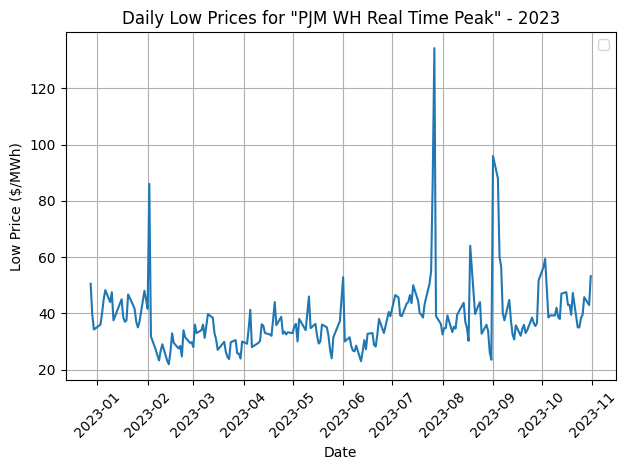

In [26]:
most_traded = daily_2023[daily_2023['Price hub'] == 'PJM WH Real Time Peak']
plt.plot(most_traded['Trade date'], most_traded['Low price $/MWh'])
plt.title('Daily Low Prices for "PJM WH Real Time Peak" - 2023')
plt.xlabel('Date')
plt.ylabel('Low Price ($/MWh)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [33]:
# daily_2023['Trade date'] = pd.to_datetime(daily_2023['Trade date'], errors='coerce')
# unique_hubs = daily_2023['Price hub'].unique()

# # Create a figure with subplots
# fig, axs = plt.subplots(len(unique_hubs), 1, figsize=(14, 5 * len(unique_hubs)), squeeze=False)

# # Plot each 'Price hub'
# for i, hub in enumerate(unique_hubs):
#     hub_daily_2023 = daily_2023[daily_2023['Price hub'] == hub].sort_values('Trade date')
#     axs[i, 0].plot(hub_daily_2023['Trade date'], hub_daily_2023['Low price $/MWh'], label=f'{hub} Low Price $/MWh')
#     axs[i, 0].set_title(f'Daily Low Prices for "{hub}" - 2023')
#     axs[i, 0].set_xlabel('Date')
#     axs[i, 0].set_ylabel('Low Price ($/MWh)')
#     axs[i, 0].legend()
#     axs[i, 0].grid(True)
#     for label in axs[i, 0].get_xticklabels():
#         label.set_rotation(45)

# # Adjust the layout so that labels do not overlap
# plt.tight_layout()
# plt.show()

In [40]:
ice_data = pd.read_csv('MES072023.csv', encoding='ISO-8859-1')
ice_data = ice_data.iloc[30:]

/var/folders/j2/0xw6vb056bvb760cjp387cf80000gn/T/ipykernel_16956/1188995893.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  ice_data = pd.read_csv('MES072023.csv', encoding='ISO-8859-1')


In [89]:
city_hall = pd.read_csv('tmpq6k6kydy.csv')
# print(city_hall.columns)
type(city_hall['DateTime_Measured'][0])
city_hall.head()
city_hall.isna().any()
city_hall = city_hall.rename(columns = {'DateTime_Measured': 'date', 'Total_Demand_KW': 'demand'})
city_hall['date'] = pd.to_datetime(city_hall['date'])
city_hall.head()

,date,demand
0,2020-03-26 15:00:00,1313
1,2020-03-26 14:45:00,1317
2,2020-03-26 14:30:00,1328
3,2020-03-26 14:15:00,1324
4,2020-03-26 14:00:00,1324


91

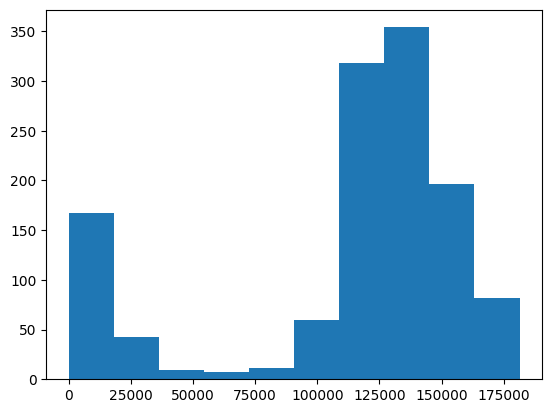

In [94]:
city_hall_daily = city_hall.resample('D', on='date').sum()
len(city_hall_daily)
plt.hist(city_hall_daily['demand'])
len(city_hall_daily[city_hall_daily['demand'] == 0])

In [64]:
boston_weather = pd.read_csv('boston_weather_data.csv')
boston_weather.head()
len(boston_weather)
boston_weather.drop(columns = ['wdir']).isna().any(axis = 1).sum()

1

In [84]:
boston_weather['year'] = boston_weather['time'].str[:4].astype(int)
# boston_weather['year'] = int(boston_weather['year'])
boston_weather_restricted = boston_weather[(boston_weather['year'] >= 2016) & (boston_weather['year'] <= 2020)]
boston_weather_restricted.isna().sum()

time      0
tavg      0
tmin      0
tmax      0
prcp      0
wdir    146
wspd      0
pres     80
year      0
dtype: int64

In [85]:
storm_data = pd.read_csv('storm_data_search_results.csv')
len(storm_data)

111